In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pickle
import os
import glob
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, f1_score


In [3]:
pip install imblearn

You should consider upgrading via the '/home/pankaj_v/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print('xlx',df.shape)

result =  pd.concat(frames, axis=0, ignore_index= True)

csv (180, 1060)
csv (244, 1060)
csv (24, 1060)
csv (200, 1060)
csv (302, 1060)
csv (16, 1060)
csv (72, 1060)
csv (244, 1060)
csv (48, 1060)
csv (90, 1060)
csv (314, 1060)
csv (78, 1060)
csv (191, 1060)
csv (310, 1060)
csv (294, 1060)
csv (132, 1059)
csv (224, 1060)
csv (224, 1060)
csv (18, 1060)
csv (236, 1060)
csv (160, 1060)
csv (42, 1060)
csv (246, 1060)
csv (302, 1060)
csv (262, 1060)
csv (162, 1060)
csv (142, 1060)
csv (154, 1060)
csv (256, 1060)
csv (192, 1060)
csv (252, 1060)
csv (78, 1060)
csv (270, 1060)
csv (186, 1060)
csv (29, 1060)
csv (276, 1060)
csv (120, 1060)
csv (80, 1060)
csv (28, 1060)
csv (249, 1060)
csv (120, 1060)
csv (248, 1060)
csv (348, 1060)
csv (290, 1060)
csv (102, 1060)
csv (180, 1060)
csv (110, 1060)
csv (198, 1060)
csv (132, 1060)
csv (222, 1060)
csv (77, 1060)
csv (110, 1060)
csv (10, 1060)
csv (60, 1060)
csv (254, 1060)
csv (36, 1060)
xlx (680, 1059)
csv (210, 1060)
csv (326, 1060)
csv (90, 1060)
csv (180, 1060)
csv (230, 1060)
csv (250, 1060)
csv (302,

In [3]:
result.head()

,,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.0000,0.000000,0.00000,95.0422,100.0000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
1,F_Calibration,100.0000,0.000000,0.00000,108.1040,100.0000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
2,W_Calibration,100.0000,0.000000,0.00000,95.0422,100.0000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
3,F_Calibration,100.0000,0.000000,0.00000,108.1040,100.0000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.00,NaN
4,W_3566A2/33_H_Faint_0.30_SI1,99.7016,-0.840692,1.97141,93.8345,99.2302,104.8660,569.412,90.5883,0.017551,...,97.4079,97.6368,98.0312,97.8384,97.8231,-33.8442,-71.7545,-33.0428,-1563.49,NaN


In [4]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [6]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'409.561':'570.067']


In [7]:
df = pd.concat([result_2,result_3], axis=1)
df.head()


,409.561,410.336,411.111,411.886,412.661,413.436,414.211,414.985,415.76,416.535,...,563.98,564.741,565.502,566.263,567.024,567.785,568.546,569.306,570.067,Output
0,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,W_Calibration
1,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,F_Calibration
2,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,W_Calibration
3,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,F_Calibration
4,78.4938,79.1364,79.4559,79.5641,79.9748,80.6503,81.5699,82.5066,83.4673,84.5349,...,99.5446,99.5813,99.6022,99.6135,99.6323,99.6533,99.6538,99.6645,99.6759,W_3566A2/33_H_Faint_0.30_SI1


In [48]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

In [8]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index()
df_with_F = df_without_calb[df_without_calb['Output'].str.split('_').str[0] == 'F']


In [9]:
df_with_F['quality'] = df_with_F['Output'].str.extract(pat=r'(Faint|None|Medium|Very Strong)', expand=False)

In [10]:
df_with_F.dropna(inplace=True)

In [11]:

df_with_F.drop(columns='Output', inplace=True)

[Text(0.5, 1.0, 'Qualitywise Count'), Text(0, 0.5, 'Count')]

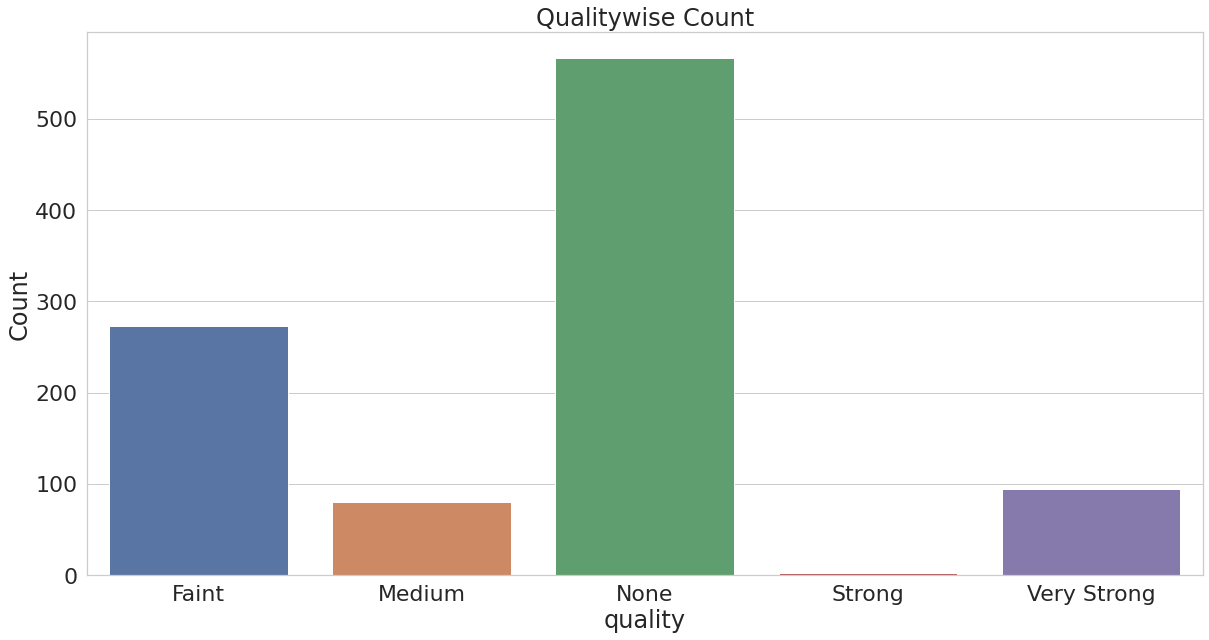

In [ ]:
group_df = df_with_F.groupby(['quality'])['300.377'].count()
group_df = group_df.reset_index()
plt.figure(figsize=(20,10))
sns.set(style ="whitegrid", font_scale = 2)
sns.barplot( x = 'quality', y = '300.377', data=group_df).set(title = 'Qualitywise Count', ylabel = 'Count')

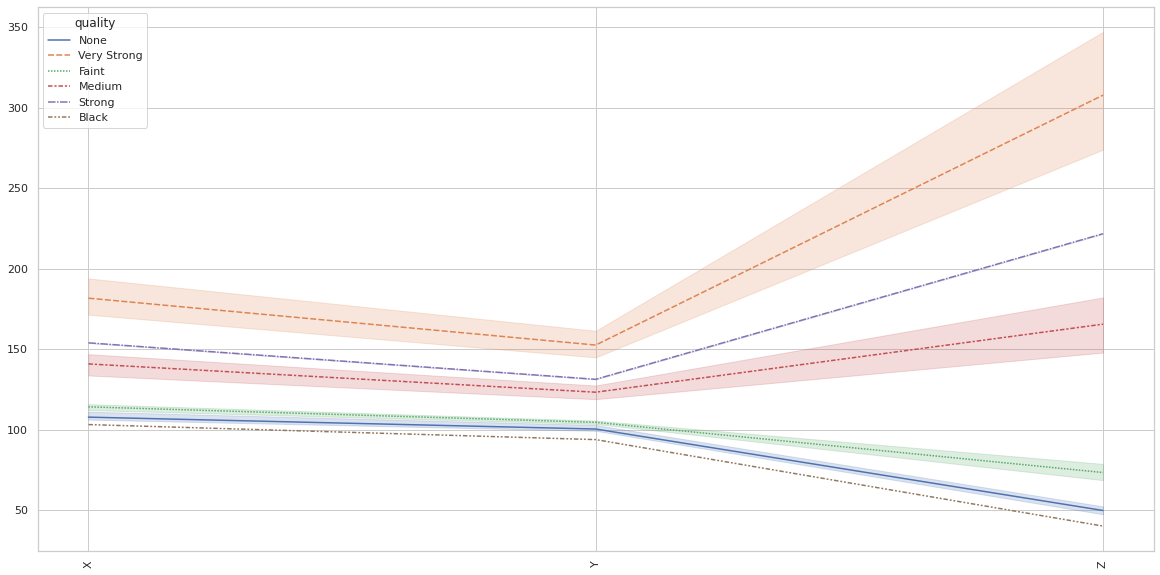

In [ ]:
plt.figure(figsize=(20,10))
sns.set(style ="whitegrid", font_scale = 1)
sns.lineplot(data=test_1.loc[:,'X':'Z'].T, ci = 99)
plt.xticks(rotation = 90)
plt.show()

In [16]:
data1 = pd.concat([df_with_F.loc[:, 'quality'],df_with_F], axis = 1)
test_1 = data1.set_index('quality').T

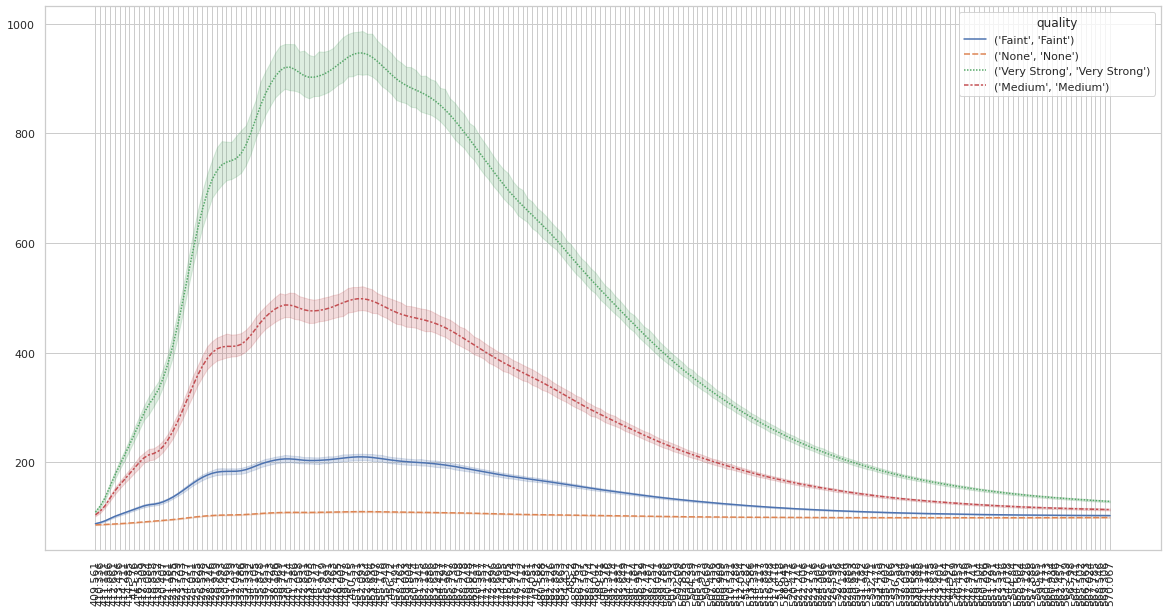

In [18]:
plt.figure(figsize=(20,10))
sns.set(style ="whitegrid", font_scale = 1)
sns.lineplot(data=test_1, ci = 99)
plt.xticks(rotation = 90)
plt.show()

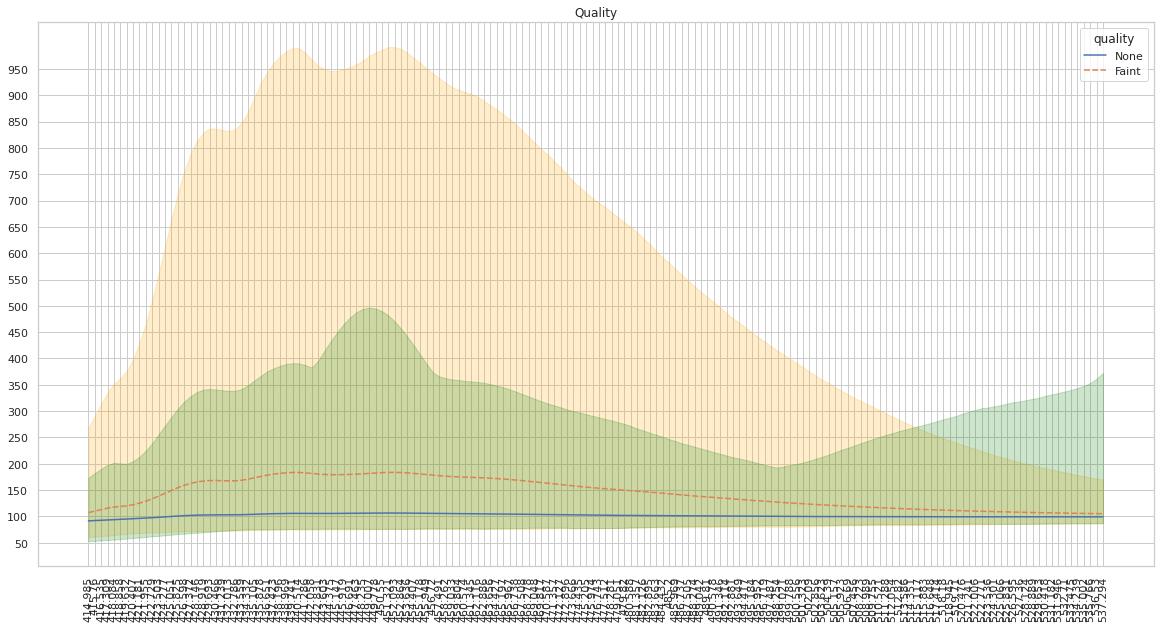

In [ ]:
plt.figure(figsize=(20,10))
g1 = sns.lineplot(data=test_1, ci = None)
# g2 = sns.lineplot(data=test_1, ci = None)
g1.fill_between(test3.index, test3.lower_faint, test3.upper_faint, edgecolors='orange' ,color= 'orange', alpha=0.2)
g1.fill_between(test.index, test.lower, test.upper, edgecolors = 'green', color = 'green' , alpha=0.2)
# g1.set(xticklabels=[])
g1.set_title('Quality')
plt.xticks(rotation = 90)
plt.yticks(np.arange(50,1000,50))
plt.show()

In [ ]:
df_without_calb.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/processed_ver_2.xlsx', sheet_name='processed')
df_with_w.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/processed_ver_W_2.xlsx', sheet_name='df_w')
df_with_F.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/processed_ver_F_2.xlsx', sheet_name='df_F')


In [15]:
df_with_F

,409.561,410.336,411.111,411.886,412.661,413.436,414.211,414.985,415.76,416.535,...,563.98,564.741,565.502,566.263,567.024,567.785,568.546,569.306,570.067,quality
5,81.7189,83.3119,85.2826,87.6230,90.0757,92.4773,94.9329,97.5647,100.3050,103.0160,...,104.2430,104.2100,103.9670,103.7750,103.7010,104.0500,103.5350,103.5140,103.8720,Faint
7,73.3941,73.8254,74.3421,74.8095,75.2469,75.8199,76.5629,77.2774,78.0910,79.0088,...,97.3195,97.3238,97.4364,97.7545,97.8347,98.2498,98.4666,98.4592,98.7186,None
11,84.1297,84.2579,84.4476,84.3377,84.2816,84.3808,84.5592,84.7290,85.0532,85.2482,...,97.9570,97.9167,98.0537,98.1104,97.9845,97.9242,98.2939,98.2145,98.1708,None
13,69.5257,69.7942,70.0768,70.2345,70.5242,70.8992,71.2998,71.6861,72.2616,72.6837,...,95.2780,95.2327,95.3706,95.2900,95.1255,95.3286,95.5682,95.6705,95.7219,None
17,84.8302,85.1139,85.3658,85.7351,86.0314,86.4350,86.8046,87.2386,87.7182,88.1675,...,100.7830,100.7800,100.6140,100.5000,100.2830,100.2580,99.9717,99.9518,99.9450,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15147,99.8492,100.2660,101.3720,102.4060,103.5840,104.4530,105.0940,105.7680,106.4060,107.0820,...,103.4510,103.2850,103.3390,103.4080,103.0260,103.1840,103.0560,103.1270,103.2610,None
15151,95.8264,97.0405,98.4859,101.1140,103.9970,105.8690,107.6080,109.1960,110.9500,112.2100,...,99.2307,99.4397,99.5634,99.4329,99.5516,99.4882,99.7727,99.7826,99.6668,Faint
15153,90.5714,91.5293,92.8535,94.7488,97.0189,98.4237,99.7654,101.1340,102.4900,103.7210,...,98.8745,99.1032,99.3131,99.2865,99.2308,99.0764,99.1264,99.4050,99.5729,None
15157,95.3274,95.5332,95.5682,95.9345,96.2267,96.2339,96.3355,96.6464,96.8085,96.8858,...,98.8620,98.8290,98.7031,98.5953,98.3416,98.3172,98.5095,98.6015,98.2920,None


In [19]:
df_with_F.reset_index(drop=True, inplace=True)

In [20]:
x = df_with_F.iloc[:,:-1]
y = df_with_F.iloc[:,-1]

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state =42, stratify = y)

In [143]:
balanced_ = class_weight.compute_class_weight(class_weight='balanced', classes=y.value_counts().keys(),y=y)
balanced = dict(zip(df_with_F['quality'].value_counts().keys(),balanced_))
balanced

{'None': 0.44497863247863245,
 'Faint': 1.0836947094535994,
 'Very Strong': 1.9047256097560976,
 'Medium': 3.279527559055118}

In [144]:
et_skf = ExtraTreesClassifier( 
                            criterion = 'entropy',
                            class_weight='balanced', 
                            warm_start=True, 
                            max_samples=None, 
                            bootstrap=True,
                            max_depth=12,
                            n_estimators=250
                            )

In [148]:
lst_accu_stratified = []
lst_accu_stratified_train = []
skf = StratifiedKFold(n_splits=8,shuffle=True)

for train_index, test_index in skf.split(X_train, Y_train):
  x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]

  et_skf.fit(x_train_fold, y_train_fold)
  y_train_pred = et_skf.predict(x_train_fold)
  Y_pred = et_skf.predict(x_test_fold)
  # print(classification_report(y_test_fold, Y_pred))

  lst_accu_stratified.append(metrics.f1_score(y_test_fold,Y_pred,average='weighted'))
  lst_accu_stratified_train.append(et_skf.score(x_train_fold,y_train_fold))

print(f"train_accuracy={lst_accu_stratified_train}")
print(f"f1_score={lst_accu_stratified}")

print(f" over all train_accuracy={np.mean(lst_accu_stratified_train)*100}")
print(f"f1_score_mean = {np.mean(lst_accu_stratified)*100}")

train_accuracy=[0.9774156660949114, 0.9777015437392796, 0.9768439108061749, 0.9788450543167524, 0.9765580331618068, 0.9788450543167524, 0.977707916547585, 0.9779937124892827]
f1_score=[0.9800479810568294, 0.9780173040199542, 0.9838928230732301, 0.9699077338172498, 0.986, 0.9697060551915824, 0.9779252558562668, 0.9758361073094621]
 over all train_accuracy=97.77388614340681
f1_score_mean = 97.76666575405719


In [149]:
y_preds = et_skf.predict(X_test)

In [150]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

       Faint       0.96      0.94      0.95       231
      Medium       0.91      0.95      0.93        76
        None       0.98      0.98      0.98       562
 Very Strong       0.98      0.96      0.97       131

    accuracy                           0.97      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.97      0.97      0.97      1000



In [153]:
pickle.dump(et_skf, open(f'/home/pankaj_v/Documents/Data_analysis_dixit/Models/quality_extra_trees_{round(np.mean(lst_accu_stratified)*100,2)}.pkl', 'wb'))